<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/2-pivot_tables_%26_join_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/2_Pivot_Table_y_Joins/clase-2-ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>


# Ejercicios Pandas II

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Parámetros y extracción de datos

In [2]:
ESTIMACIONES_URL = "http://datos.agroindustria.gob.ar/dataset/9e1e77ba-267e-4eaa-a59f-3296e86b5f36/resource/95d066e6-8a0f-4a80-b59d-6f28f88eacd5/download/estimaciones-agricolas-al-30-09-2019.csv"
ESTIMACIONES_URL_S3 = "https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/2_Pivot_Table_y_Joins/ejercicios/estimaciones_agricolas.zip"
ESTIMACIONES_PATH = "data/estimaciones-agricolas.csv"

In [3]:
converters = {
    "id_provincia": lambda x: str(x).zfill(2),
    "id_departamento": lambda x: str(x).zfill(3),
}

#estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)
estimaciones = pd.read_csv(ESTIMACIONES_URL_S3, encoding="utf8", converters=converters)
#estimaciones.to_csv(ESTIMACIONES_PATH, encoding="utf8", index=False)
#estimaciones = pd.read_csv(ESTIMACIONES_PATH, converters=converters)

## Ejercicios

Explorar descriptivamente el dataset de estimaciones agrícolas (https://datos.gob.ar/dataset/agroindustria-agricultura---estimaciones-agricolas) usando los elementos aprendidos en la clase 2.

Intentemos mostrar la información usando el método `plot()` y aprovechar `pivot_table` para condensar y/o agregar la información.

### 1. Comencemos explorando un poco los datos ¿Ves algún problema en los nombres de las columnas?

In [4]:
estimaciones.sample(5)

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
35481,06,BUENOS AIRES,217,CHASCOMUS,26,Sorgo,43,2011/2012,600,600,2330,3883
18654,06,BUENOS AIRES,511,MAIPU,14,Girasol,1,1969/1970,1100,1100,830,755
135495,90,TUCUMAN,014,CRUZ ALTA,28,Trigo total,2,1970/1971,2500,2500,2970,1188
128939,86,SANTIAGO DEL ESTERO,035,LA BANDA,21,Naranja,14,1982/1983,190,165,3170,19212
73,06,BUENOS AIRES,063,BALCARCE,1,Ajo,11,1979/1980,450,450,2360,5244


In [5]:
estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada ',
       'sup_cosechada', 'produccion ', 'rendimiento'],
      dtype='object')

In [6]:
estimaciones.shape

(136051, 12)

**Hay columnas con espacios al final, eso trae incovenientes**

In [7]:
# para cada columna del df, corregimos el error del espacio
estimaciones.columns = [col.strip() for col in estimaciones.columns]

In [8]:
# corroborramos que esten correctas
estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada',
       'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

### 2. ¿Cuál es la producción agrícola total en cada año?

* Observemos la columna "campaña". Esta columna representa los períodos de producción como un string con año de inicio y fin ¿Podríamos transformarlo en un valor numérico?

In [9]:
estimaciones.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333
1,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000
2,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467
3,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500
4,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500


In [10]:
# correccion de error
estimaciones["campaña"] = estimaciones.campaña.str.replace("2010/2017", "2010/2011")

In [11]:
# para facilitar el analisis, dividimos en dos columnas (campania_inicio y campania_fin) a la columna campania
estimaciones[["campania_inicio", "campania_fin"]] = estimaciones.campaña.str.split("/", n=1, expand=True)
estimaciones["campania_inicio"] = estimaciones["campania_inicio"].astype(int)
estimaciones["campania_fin"] = estimaciones["campania_fin"].astype(int)

In [15]:
# ¿Cuál es la producción agrícola total en cada año?
produccion_anual =  estimaciones.pivot_table( # creamos tabla dinamica para el df estimaciones
    index=["campaña"],
    values=["produccion"],
    aggfunc="sum"
)
produccion_anual.head()

,produccion
campaña,
1969/1970,39023146
1970/1971,37848428
1971/1972,33719119
1972/1973,48422530
1973/1974,47853150


<Axes: title={'center': 'Produccion agricola total'}, xlabel='Año de inicio'>

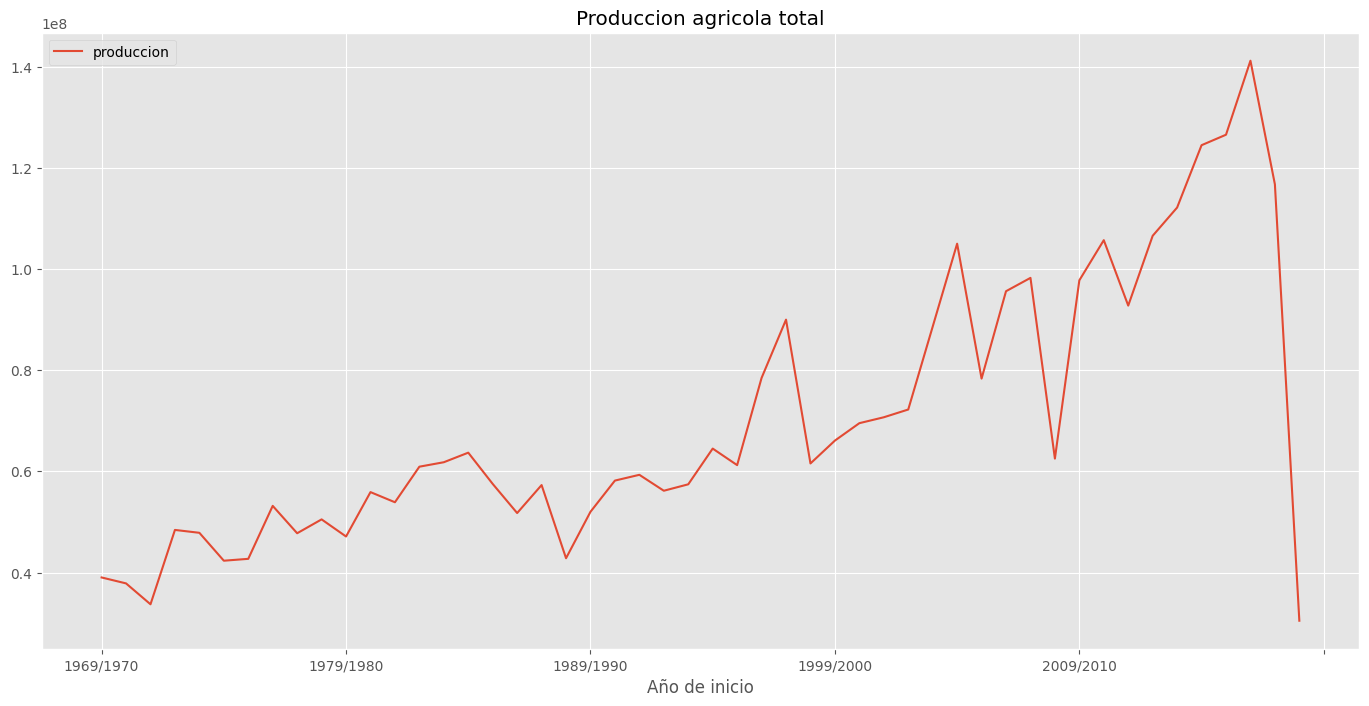

In [20]:
produccion_anual.plot(
    figsize=(17,8), # tamaño del grafico
    title="Produccion agricola total", # titulo
    xlabel="Año de inicio" # eje x (abscisas)
)


### 3. Enfoquémonos en un período específico, por ejemplo, la campaña "2017/2018":

* ¿Cuál fue la producción promedio del cultivo de soja en los departamentos que la sembraron en ese período?
* ¿Cuál es y en qué departamento está el rendimiento (kg por hectárea) mínimo, mediano y máximo en la provincia de Buenos Aires? (La mediana es el valor que, si los datos están ordenados, queda en el centro de ellos)

**Observación:**
Como no estamos viendo una variable en función de un período de tiempo como antes, quizás un gráfico de líneas no sea la mejor opción. Les sugerimos investigar sobre el parámetro *"kind"* del [método "plot" de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) que permite construir distintos tipos de gráficos.

In [21]:
estimaciones.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento,campania_inicio,campania_fin
0,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333,1969,1970
1,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000,1970,1971
2,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467,1969,1970
3,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500,1970,1971
4,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500,1971,1972


In [48]:
estimaciones.shape

(136051, 14)

In [22]:
estimaciones.cultivo.unique() # buscamos los valores de la columna cultivo

array(['Ajo', 'Alpiste', 'Avena', 'Cártamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebada total', 'Cebolla total', 'Centeno',
       'Colza', 'Girasol', 'Limón', 'Lino', 'Maíz', 'Mandarina', 'Maní',
       'Mijo', 'Naranja', 'Papa total', 'Pomelo', 'Poroto seco',
       'Soja total', 'Sorgo', 'Trigo candeal', 'Trigo total', 'Algodón',
       'Jojoba', 'Arroz', 'Caña de azúcar', 'Banana', 'Té', 'Tung',
       'Yerba mate'], dtype=object)

In [36]:
# ¿Cuál fue la producción promedio del cultivo de soja en los departamentos que la sembraron en ese período?
estimaciones_soja = estimaciones[(estimaciones.cultivo == "Soja total") & (estimaciones.campaña == "2017/2018")]

# indexamos al df por la columna cultivo cuando es igual al str "Soja total"
# tambien indexamos al df por la columna campaña cuando es dentro del periodo 2017/2018
# creamos la variable  estimaciones_soja para poder trabajar con esa indexacion

# a partir de esa variable, construimos una tabla dinamica que filtre por: provincia, produccion y valores promediados.
produccion_promedio_soja = estimaciones_soja.pivot_table( # tabla dinamica que filtra por provincia y su promedio de produccion
    index="provincia",
    values="produccion",
    aggfunc="mean"
)

# imprimimos tabla dinamica
produccion_promedio_soja

,produccion
provincia,
BUENOS AIRES,122109.907216
CATAMARCA,29672.000000
CHACO,56048.421053
CORDOBA,487858.500000
CORRIENTES,40000.000000
ENTRE RIOS,85512.500000
FORMOSA,61250.000000
JUJUY,2107.571429
LA PAMPA,86232.307692


<Axes: title={'center': 'Produccion promedio soja'}, ylabel='provincia'>

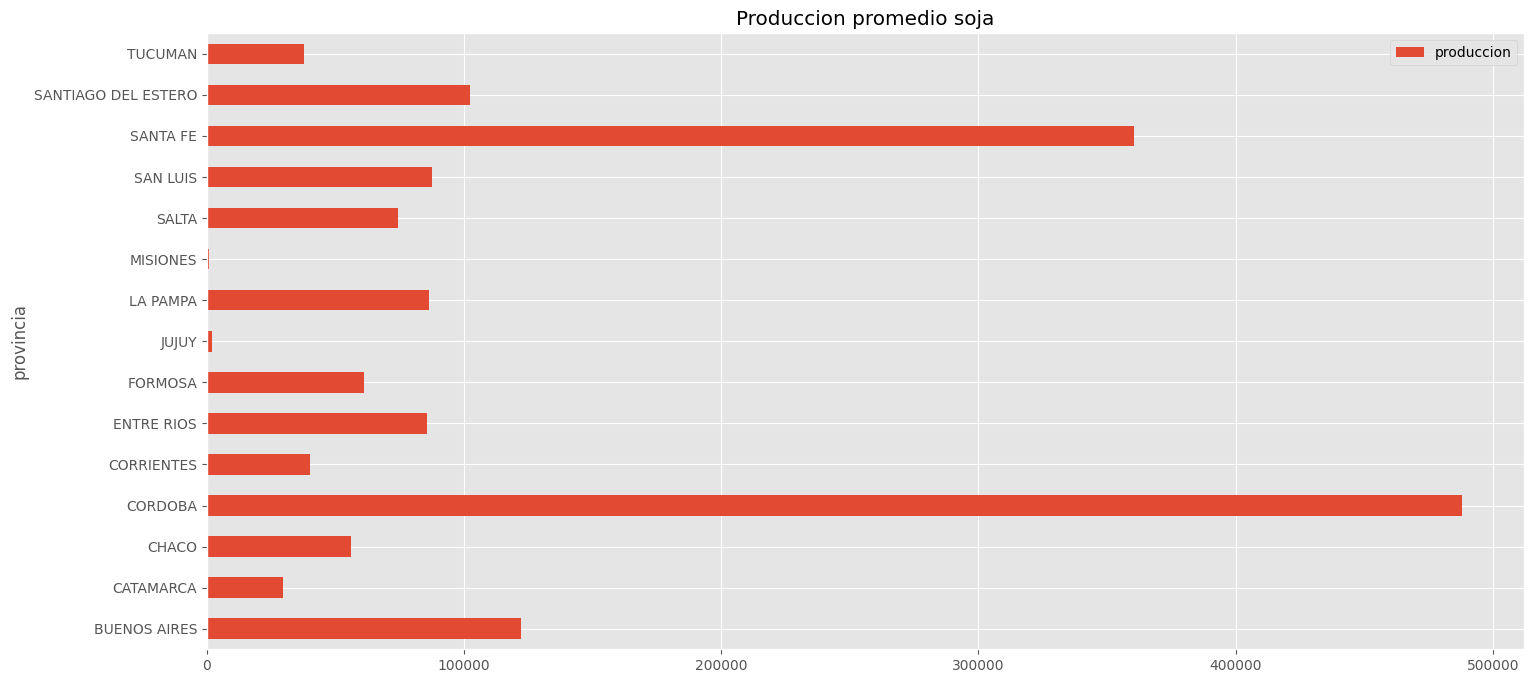

In [38]:
# cosntruimos un grafico de barras laterales
# como no es en funcion del tiempo, no tiene sentido usar un grafico line plot
# se construira a partir de un grafico "barh".

produccion_promedio_soja.plot(kind="barh", title= "Produccion promedio soja", figsize=(17,8))
# kind --> tipo de grafico de plt
# title --> titulo
# digsize --> tamaño

*¿Cuál es y en qué departamento está el rendimiento (kg por hectárea) mínimo, mediano y máximo en la provincia de Buenos Aires? (La mediana es el valor que, si los datos están ordenados, queda en el centro de ellos)*

In [49]:
rendimiento_pba = estimaciones[estimaciones.provincia == "BUENOS AIRES"].pivot_table(
    index="provincia",
    values="rendimiento",
    aggfunc=['median', 'min', 'max']
)
rendimiento_pba

,median,min,max
,rendimiento,rendimiento,rendimiento
provincia,,,
BUENOS AIRES,1900,0,50000


### 4. Creá una tabla con la producción promedio de soja y otra con la de papa. Combinalas usando `merge` de modo que solo queden las campañas en las que se sembraron ambos productos.

In [39]:
estimaciones.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento,campania_inicio,campania_fin
0,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333,1969,1970
1,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000,1970,1971
2,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467,1969,1970
3,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500,1970,1971
4,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500,1971,1972


In [40]:
estimaciones.cultivo.unique()

array(['Ajo', 'Alpiste', 'Avena', 'Cártamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebada total', 'Cebolla total', 'Centeno',
       'Colza', 'Girasol', 'Limón', 'Lino', 'Maíz', 'Mandarina', 'Maní',
       'Mijo', 'Naranja', 'Papa total', 'Pomelo', 'Poroto seco',
       'Soja total', 'Sorgo', 'Trigo candeal', 'Trigo total', 'Algodón',
       'Jojoba', 'Arroz', 'Caña de azúcar', 'Banana', 'Té', 'Tung',
       'Yerba mate'], dtype=object)

In [50]:
# produccion promedio de soja
soja_promedio = estimaciones[(estimaciones.cultivo == "Soja total")].pivot_table(
    index="campaña",
    values="produccion",
    aggfunc="mean"
)

# produccion promedio de papa
papa_promedio = estimaciones[(estimaciones.cultivo == "Papa total")].pivot_table(
    index="campaña",
    values="produccion",
    aggfunc="mean"
)

# tenemos las dos tablas dinamicas, ahora las joineamos
produccion_promedio_porCampaña = papa_promedio.merge(soja_promedio, left_on="campaña", right_on="campaña", suffixes=("_promedio_papa", "_promedio_soja"))
produccion_promedio_porCampaña

# resumen: 1) se crea una variable que almacena 2) con la funcion merge, unis las dos tablas
# 3) con left_on y right_on decidis el esquema del nuevo cuadro
# 4) suffixes es solo para poner sufijos a las palabras


,produccion_promedio_papa,produccion_promedio_soja
campaña,,
1969/1970,7357.003155,515.384615
1970/1971,6323.734628,983.333333
1971/1972,4368.415033,917.647059
1972/1973,5512.140288,2471.854545
1973/1974,7868.471014,2582.708333
1974/1975,5029.440299,2993.827160
1975/1976,5587.842491,4483.870968
1976/1977,6622.921348,9655.172414
1977/1978,5727.877698,13661.202186


<Axes: title={'center': 'Produccion promedio de papa y soja'}, xlabel='campaña'>

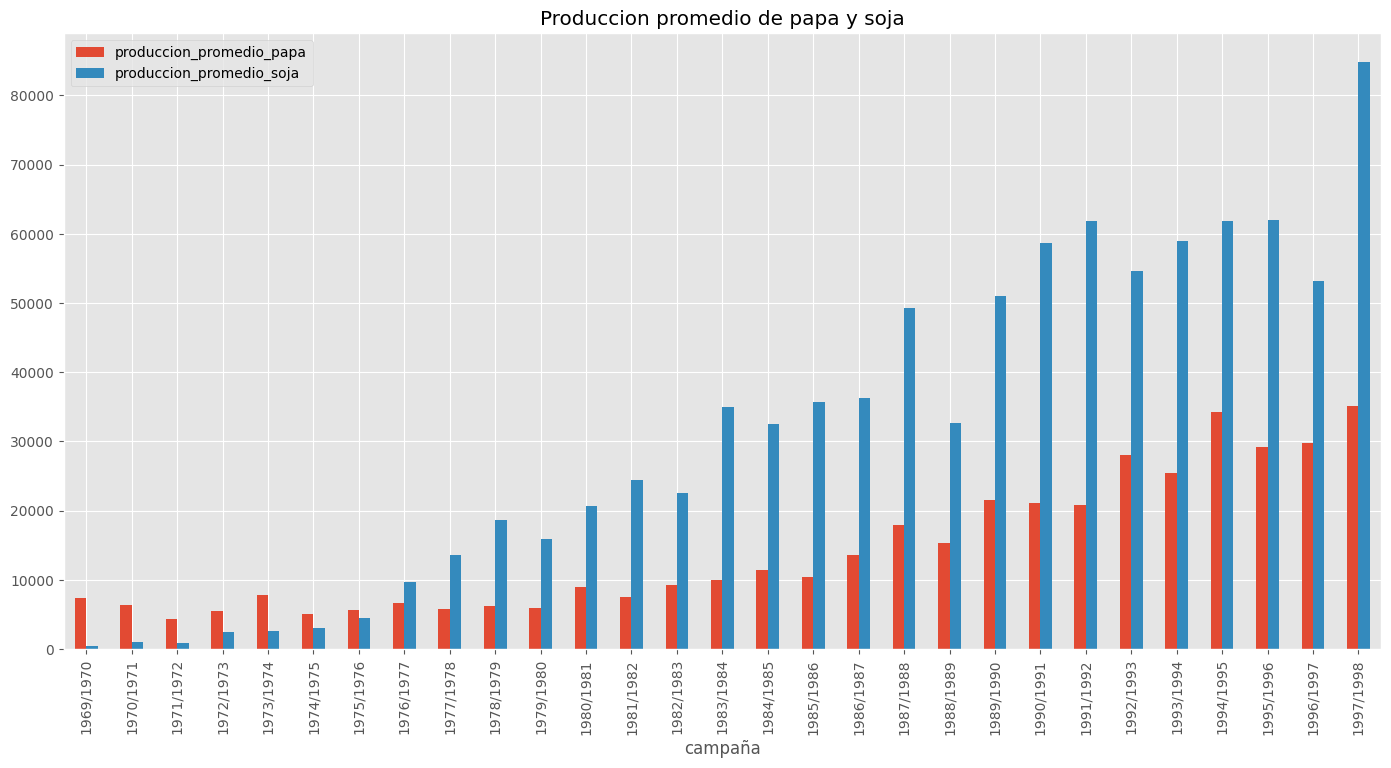

In [47]:
# lo mas logico es un grafico de barras verticales (bar)
produccion_promedio_porCampaña.plot(kind="bar", title= "Produccion promedio de papa y soja", figsize=(17,8))


### 5. Generá una tabla donde cada cultivo sea una columna, cada fila un año (una campaña) y los valores sean la producción total de cada cultivo.

In [53]:
cultivo_produccion = estimaciones.pivot_table(
    columns="cultivo", # columnas de la tabla dinamica
    index="campaña", # filas (campañas son los años de cultivo)
    values="produccion", # produccion son los valores
    aggfunc="sum"
)
cultivo_produccion

cultivo,Ajo,Algodón,Alpiste,Arroz,Avena,Banana,Caña de azúcar,Cebada cervecera,Cebada forrajera,Cebada total,...,Papa total,Pomelo,Poroto seco,Soja total,Sorgo,Trigo candeal,Trigo total,Tung,Té,Yerba mate
campaña,,,,,,,,,,,,,,,,,,,,,
1969/1970,49110.0,458200.0,107000.0,407000.0,425000.0,223440.0,9700000.0,499500.0,70486.0,NaN,...,2332170.0,130995.0,39388.0,26800.0,3820000.0,NaN,7019726.0,148600.0,111000.0,76788.0
1970/1971,49214.0,285000.0,39300.0,288000.0,359960.0,224800.0,10260000.0,318500.0,48478.0,NaN,...,1954034.0,143584.0,58920.0,59000.0,4660000.0,NaN,4919767.0,110000.0,129000.0,90460.0
1971/1972,50746.0,292200.0,26200.0,294000.0,475000.0,312700.0,12870000.0,476000.0,77000.0,NaN,...,1336735.0,139854.0,57923.0,78000.0,2360000.0,NaN,5439840.0,170000.0,131000.0,126714.0
1972/1973,54545.0,424000.0,35000.0,260000.0,566000.0,352160.0,16870000.0,760000.0,120000.0,NaN,...,1532375.0,179230.0,72791.0,271904.0,4960000.0,NaN,7896787.0,25000.0,128600.0,150963.0
1973/1974,66821.0,418400.0,34000.0,316000.0,561000.0,399400.0,15536000.0,608000.0,124000.0,NaN,...,2171698.0,177000.0,115150.0,495880.0,5900000.0,NaN,6559916.0,136000.0,140000.0,134529.0
1974/1975,67621.0,541000.0,25400.0,351000.0,327000.0,374300.0,15600000.0,365000.0,65000.0,NaN,...,1347890.0,185000.0,108535.0,485000.0,4830000.0,NaN,5969991.0,61000.0,165000.0,142308.0
1975/1976,68525.0,445000.0,32800.0,309000.0,432900.0,277500.0,14310000.0,447800.0,74900.0,NaN,...,1525481.0,180000.0,170390.0,695000.0,5060000.0,NaN,8570000.0,118000.0,133000.0,121135.0
1976/1977,72925.0,522000.0,39000.0,320000.0,530000.0,220000.0,16000000.0,670000.0,90000.0,NaN,...,1768320.0,170000.0,154798.0,1400000.0,6600000.0,582000.0,11000000.0,100000.0,168000.0,127167.0
1977/1978,78900.0,786200.0,60000.0,310000.0,570000.0,128700.0,13600000.0,290000.0,63000.0,NaN,...,1592350.0,145000.0,132720.0,2500000.0,7200000.0,353100.0,5299995.0,82400.0,103000.0,133436.0
